**Background & Motivation:**

Water is the ultimate gift of nature to humanity and every living organism. Most of us have the luxury to lead our daily lives without feeling blunt of water scarcity but there are people in some parts of the world where they would have to walk several miles to have access to water.  The situation worsens for them if this access, such as pumps, wells, or other water-points, also shuts down unexpectedly. 

**Problem Statement:**

If a Machine Learning algorithm can predict which water point may fail in the immediate future, they can divert the maintenance resource towards that point with reasonable advance notice.

 The goal is to build an ML model(s) which train on the given data, is appropriately validated, and finally predicts on the test data provided to you.



**Attribute Description:**

● Id - row id 

● Amount_of _water - Amount of water available in the waterpump 

● Gps_height - Altitude of the well

 ● Waterpoint_type - The kind of waterpoint 

● Basin_name - Geographic water basin

 ● Village - Geographic location

 ● Region_name - Geographic location 

● Region_code- Geographic location (coded)

● Wardname- Geographic location(renamed the original location)

● District_code - Geographic location (coded)

● Population – No of people around the well 

● Public_meeting – Is there any public meetings were conducted. (If Yes TRUE otherwise False) 

● Organization_funding - organization that provides money for that well construction 

● Organization_surveyed– organization which has done survey to collect the data.

● Scheme_management - Organization operating the water point 

● Scheme¬_name – scheme name under which water point sanctioned.

● Permit - Is the waterpoint has the permission to use 

● Company_installed - Organization that installed the pump

● Management - How the waterpoint is managed 

● Management_group – Group which manages the water point. 

● Extraction_type – Way of extracting the water

● Extraction_type_group - Way of extracting the water 

● Extraction_type_class – class of equipment used to extract the water 

● Payment - What the water costs type of payment 

● Payment_type - What the water costs type of payment 

● Water_quality - The quality of the water 

● Quality_group - The quality of the water 

● Quantity - The quantity of water
 
● Quantity_group - The quantity of water 

● Source - The source of the water

● Source_type - The source of the water 

● Source_class - The source of the water

● Waterpoint_type_group - The kind of waterpoint. 

● Status- Target variable (1/0 - functional/non-functional)



In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
tr=pd.read_csv('/content/train_data_hk.csv')
tst=pd.read_csv('/content/test_data_hk.csv')

In [14]:
tr.head()

,Id,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,District_code,...,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group,Status
0,56421,0.0,1555,hand pump,basin3,village8556,region4,15,ward500,3,...,never pay,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,0
1,21324,500.0,857,communal standpipe multiple,basin7,village7372,region5,10,ward1800,5,...,monthly,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,0
2,74,0.0,0,communal standpipe,basin1,village9460,region6,17,ward883,3,...,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,0
3,74038,0.0,0,other,basin5,village13878,region13,18,ward1505,7,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,other,0
4,29929,0.0,0,hand pump,basin4,village5192,region6,14,ward942,4,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,1


In [15]:
tr.describe()

,Id,Amount_of_water,Gps_height,Region_code,District_code,Population,Status
count,44068.000000,44068.000000,44068.000000,44068.000000,44068.000000,44068.000000,44068.000000
mean,37092.516384,329.781607,674.305460,15.224539,5.664382,179.780181,0.585640
std,21490.884249,3127.604462,698.062813,17.566722,9.670612,473.609701,0.492617
min,0.000000,0.000000,-63.000000,1.000000,0.000000,0.000000,0.000000
25%,18363.250000,0.000000,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37021.500000,0.000000,370.000000,12.000000,3.000000,25.000000,1.000000
75%,55685.250000,20.000000,1327.000000,17.000000,5.000000,211.000000,1.000000
max,74242.000000,350000.000000,2628.000000,99.000000,80.000000,30500.000000,1.000000


In [16]:
tr=tr.drop(['Id'],axis=1)

## EDA

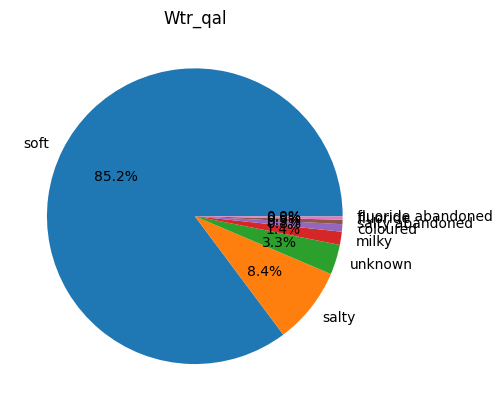

In [20]:
wtr_ql_counts = tr['Water_quality'].value_counts()
# Create a pie chart of the Rating given for the Restaurant
plt.pie(wtr_ql_counts.values, labels=wtr_ql_counts.index, autopct='%1.1f%%')
plt.title('Wtr_qal')
plt.show()

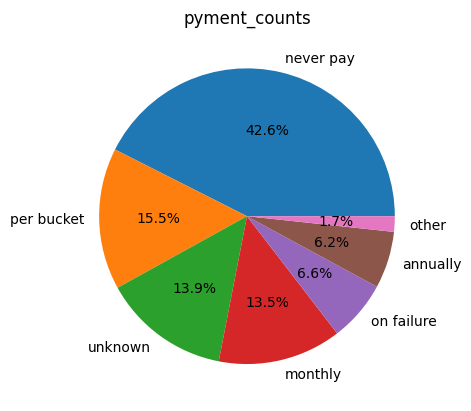

In [21]:
pyment_counts = tr['Payment_type'].value_counts()
# Create a pie chart of the Rating given for the Restaurant
plt.pie(pyment_counts.values, labels=pyment_counts.index, autopct='%1.1f%%')
plt.title('pyment_counts')
plt.show()

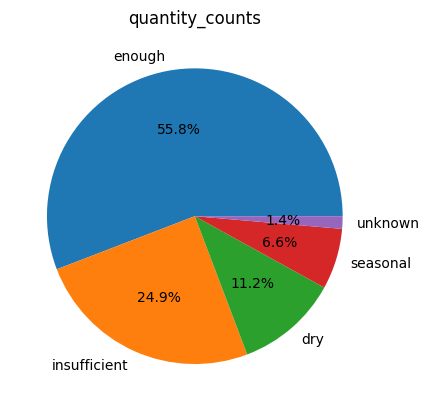

In [22]:
quantity_counts = tr['Quantity'].value_counts()
# Create a pie chart of the Rating given for the Restaurant
plt.pie(quantity_counts.values, labels=quantity_counts.index, autopct='%1.1f%%')
plt.title('quantity_counts')
plt.show()

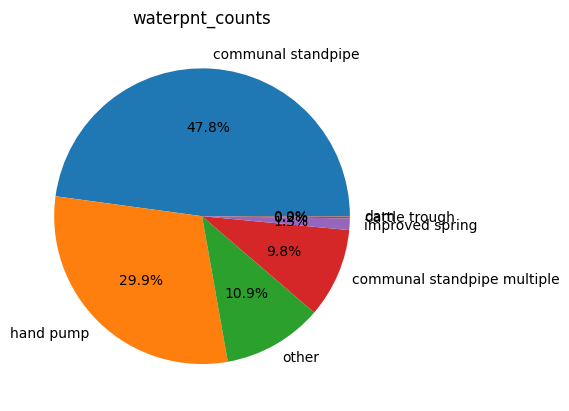

In [23]:
waterpnt_counts = tr['Waterpoint_type'].value_counts()
# Create a pie chart of the Rating given for the Restaurant
plt.pie(waterpnt_counts.values, labels=waterpnt_counts.index, autopct='%1.1f%%')
plt.title('waterpnt_counts')
plt.show()

<Axes: >

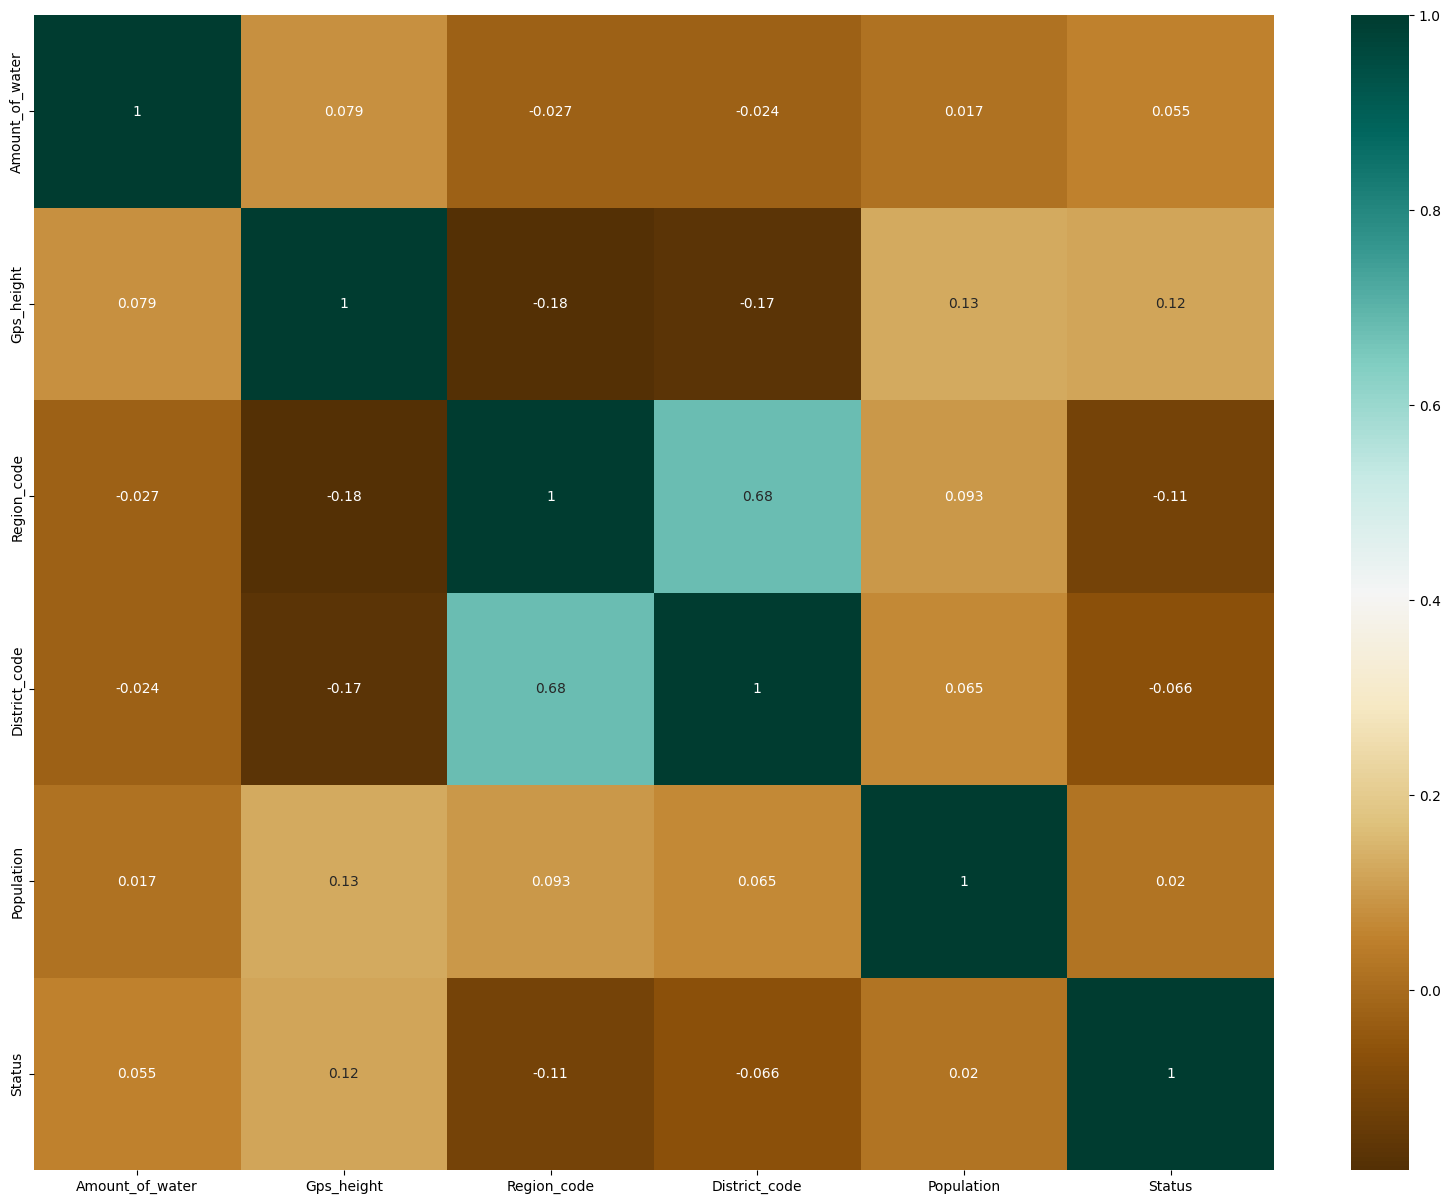

In [24]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(tr.corr(),annot=True,cmap='BrBG')

## Preprocessing

In [26]:
tr.dtypes

Amount_of_water          float64
Gps_height                 int64
Waterpoint_type           object
Basin_name                object
Village                   object
Regionname                object
Region_code                int64
Wardname                  object
District_code              int64
Population                 int64
Public_meeting            object
Organization_funding      object
Organization_surveyed     object
Scheme_management         object
SchemeName                object
Permit                    object
Company_installed         object
Management                object
Management_group          object
Extraction_type           object
Extraction_type_group     object
Extraction_type_class     object
Payment                   object
Payment_type              object
Water_quality             object
Quality_group             object
Quantity                  object
Quantity_group            object
Source                    object
Source_type               object
Source_cla

In [27]:
objcol = tr.select_dtypes(include = "object").columns

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feat in objcol:
    tr[feat] = le.fit_transform(tr[feat])

In [29]:
tr.dtypes

Amount_of_water          float64
Gps_height                 int64
Waterpoint_type            int64
Basin_name                 int64
Village                    int64
Regionname                 int64
Region_code                int64
Wardname                   int64
District_code              int64
Population                 int64
Public_meeting             int64
Organization_funding       int64
Organization_surveyed      int64
Scheme_management          int64
SchemeName                 int64
Permit                     int64
Company_installed          int64
Management                 int64
Management_group           int64
Extraction_type            int64
Extraction_type_group      int64
Extraction_type_class      int64
Payment                    int64
Payment_type               int64
Water_quality              int64
Quality_group              int64
Quantity                   int64
Quantity_group             int64
Source                     int64
Source_type                int64
Source_cla

In [30]:
tr.isnull().sum()

Amount_of_water          0
Gps_height               0
Waterpoint_type          0
Basin_name               0
Village                  0
Regionname               0
Region_code              0
Wardname                 0
District_code            0
Population               0
Public_meeting           0
Organization_funding     0
Organization_surveyed    0
Scheme_management        0
SchemeName               0
Permit                   0
Company_installed        0
Management               0
Management_group         0
Extraction_type          0
Extraction_type_group    0
Extraction_type_class    0
Payment                  0
Payment_type             0
Water_quality            0
Quality_group            0
Quantity                 0
Quantity_group           0
Source                   0
Source_type              0
Source_class             0
Waterpoint_type_group    0
Status                   0
dtype: int64

In [32]:
tst.dtypes

Id                         int64
Amount_of_water          float64
Gps_height                 int64
Waterpoint_type           object
Basin_name                object
Village                   object
Regionname                object
Region_code                int64
Wardname                  object
District_code              int64
Population                 int64
Public_meeting            object
Organization_funding      object
Organization_surveyed     object
Scheme_management         object
SchemeName                object
Permit                    object
Company_installed         object
Management                object
Management_group          object
Extraction_type           object
Extraction_type_group     object
Extraction_type_class     object
Payment                   object
Payment_type              object
Water_quality             object
Quality_group             object
Quantity                  object
Quantity_group            object
Source                    object
Source_typ

In [33]:
tst=tst.drop(['Id'],axis=1)

In [34]:
objcols = tst.select_dtypes(include = "object").columns

In [35]:
le = LabelEncoder()
for feat in objcols:
    tst[feat] = le.fit_transform(tst[feat])

In [36]:
tst.dtypes

Amount_of_water          float64
Gps_height                 int64
Waterpoint_type            int64
Basin_name                 int64
Village                    int64
Regionname                 int64
Region_code                int64
Wardname                   int64
District_code              int64
Population                 int64
Public_meeting             int64
Organization_funding       int64
Organization_surveyed      int64
Scheme_management          int64
SchemeName                 int64
Permit                     int64
Company_installed          int64
Management                 int64
Management_group           int64
Extraction_type            int64
Extraction_type_group      int64
Extraction_type_class      int64
Payment                    int64
Payment_type               int64
Water_quality              int64
Quality_group              int64
Quantity                   int64
Quantity_group             int64
Source                     int64
Source_type                int64
Source_cla

In [37]:
tst.isnull().sum()

Amount_of_water          0
Gps_height               0
Waterpoint_type          0
Basin_name               0
Village                  0
Regionname               0
Region_code              0
Wardname                 0
District_code            0
Population               0
Public_meeting           0
Organization_funding     0
Organization_surveyed    0
Scheme_management        0
SchemeName               0
Permit                   0
Company_installed        0
Management               0
Management_group         0
Extraction_type          0
Extraction_type_group    0
Extraction_type_class    0
Payment                  0
Payment_type             0
Water_quality            0
Quality_group            0
Quantity                 0
Quantity_group           0
Source                   0
Source_type              0
Source_class             0
Waterpoint_type_group    0
dtype: int64

## Model

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [40]:
X = tr.drop('Status', axis=1)
y = tr['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

In [42]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9063989108236896
